In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Replace this with the path to your Parquet file
file_path = r'C:\Users\200408\OneDrive - Betonmast\Skrivebord\NTNU\Prosjektoppgave\raw_parquetfiles\meassurement_converted_2023\08\20230801073328.parquet'

# Read the Parquet file into a Pandas DataFrame
data = pd.read_parquet(file_path)


display(data)

,Point_1_N,Point_2_N,Point_3_N,Point_4_S,Point_5_S,Point_6_S,Omega_N,Omega_S,PT100_Temperature,Point_N+1500,Point_N-1500,Point_S+2000,Point_S+1000,Point_S+0,Point_S-1000,Point_S-2000
0,35.314545,-61.711159,-62.544014,-18.663149,-65.588730,-3.309676,-1000000,-0.016788,17.442492,-9.236011,5.829021,37.342316,9.128366,-39.758965,21.674461,-35.237843
1,35.109039,-61.424534,-62.592686,-18.576620,-65.891579,-3.461101,-1000000,-0.016773,17.443764,-9.128365,6.108901,37.299255,8.934603,-39.430645,21.550669,-35.399311
2,35.136078,-61.511063,-62.771149,-19.198545,-65.691483,-3.109579,-1000000,-0.016739,17.443764,-9.300598,6.071224,36.911732,9.063778,-39.683613,22.056604,-35.555397
3,34.968430,-61.575958,-62.809006,-19.306705,-65.756378,-3.828848,-1000000,-0.016722,17.443338,-8.719311,5.371527,36.674911,8.756988,-40.264900,21.642168,-35.872952
4,35.119854,-61.727383,-62.625134,-19.717716,-65.339958,-3.580078,-1000000,-0.016760,17.440796,-8.875398,5.823639,37.412285,9.004573,-39.855846,21.663698,-35.442371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72032,32.843071,-63.160515,-64.279991,-21.069727,-68.060204,-5.078105,-1000000,-0.008631,17.084757,-10.533142,4.644918,35.867569,6.824746,-41.949554,20.032864,-35.695335
72033,32.599709,-63.566116,-64.317848,-21.448290,-67.459915,-5.353916,-1000000,-0.008726,17.084333,-10.339380,4.262775,35.781452,6.840893,-41.766556,20.269684,-36.244331
72034,32.534813,-63.376835,-64.085304,-20.950750,-66.919106,-5.456668,-1000000,-0.008622,17.084757,-10.285557,4.844063,35.587688,7.072331,-41.459766,20.474211,-36.238949
72035,32.421242,-63.506630,-63.971737,-21.415842,-67.497772,-5.683806,-1000000,-0.008635,17.085182,-10.161764,4.198188,35.733009,7.373739,-41.944172,20.183569,-36.066715


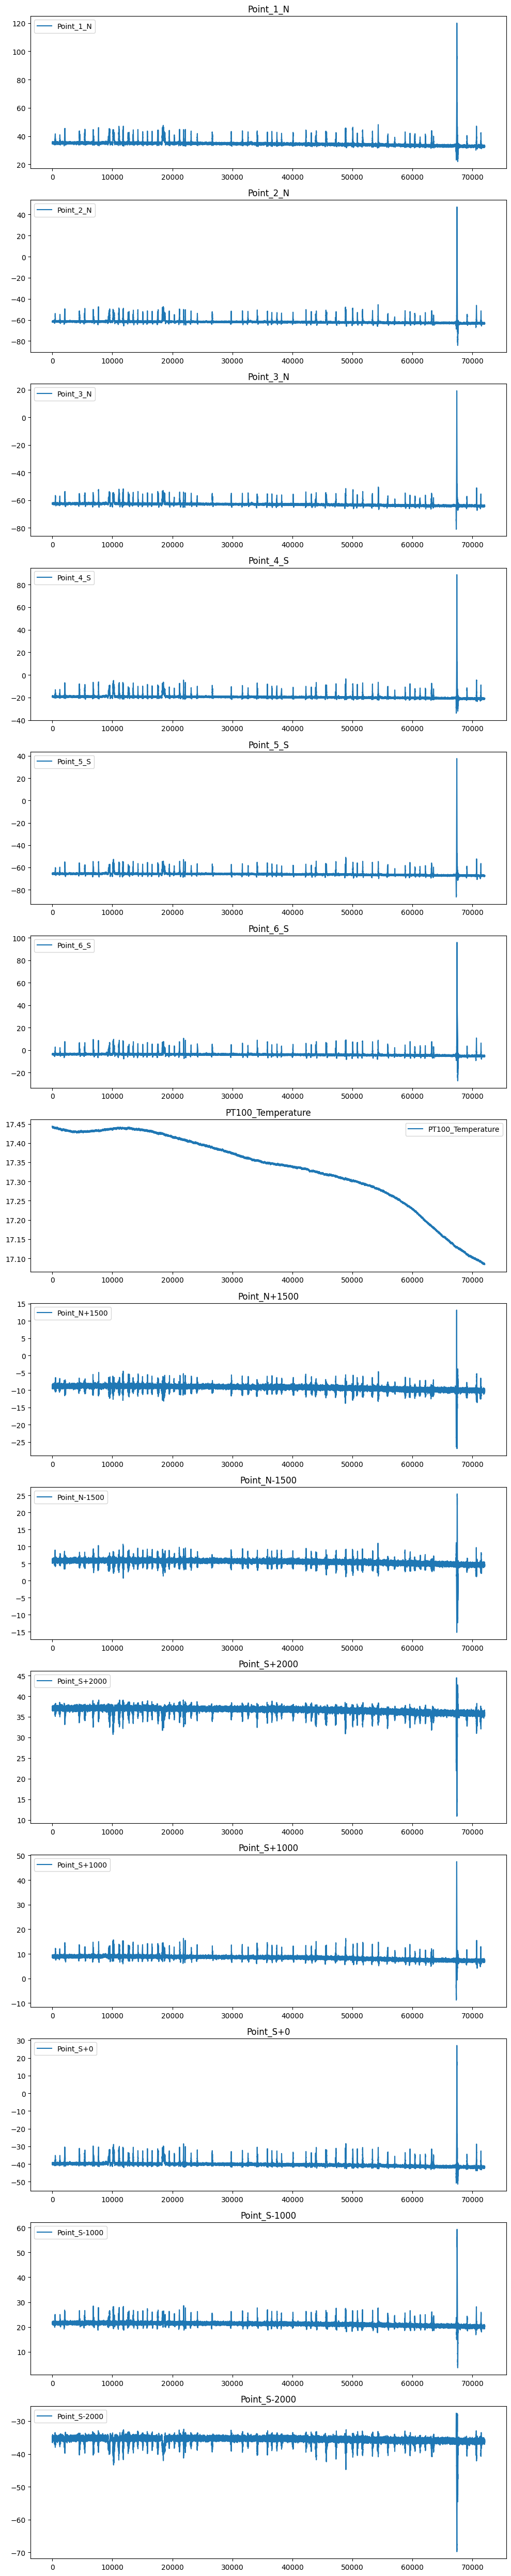

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Define the columns to plot, excluding 'Omega_N' and 'Omega_S' due to outlier values
columns_to_plot = ['Point_1_N', 'Point_2_N', 'Point_3_N', 'Point_4_S', 'Point_5_S', 'Point_6_S',
                   'PT100_Temperature', 'Point_N+1500', 'Point_N-1500', 'Point_S+2000', 'Point_S+1000',
                   'Point_S+0', 'Point_S-1000', 'Point_S-2000']

# Setup the figure and subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 50))

for i, col in enumerate(columns_to_plot):
    axs[i].plot(data[col], label=col)
    axs[i].set_title(col)
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:


# Compute the mean for the specified columns only
average_values = data[['Point_1_N', 'Point_2_N', 'Point_3_N', 'Point_4_S', 'Point_5_S', 'Point_6_S', 'Omega_N', 'Omega_S', 'PT100_Temperature']].mean()

# Create a new DataFrame to present the average values with specified column names
aggregated_df = pd.DataFrame([average_values], columns=average_values.index).rename(columns={
    'Point_1_N': 'Point_1_N_mean',
    'Point_2_N': 'Point_2_N_mean',
    'Point_3_N': 'Point_3_N_mean',
    'Point_4_S': 'Point_4_S_mean',
    'Point_5_S': 'Point_5_S_mean',
    'Point_6_S': 'Point_6_S_mean',
    'Omega_N': 'Omega_N_mean',
    'Omega_S': 'Omega_S_mean',
    'PT100_Temperature': 'PT100_Temperature_mean'
})

aggregated_df


,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean,Omega_N_mean,Omega_S_mean,PT100_Temperature_mean
0,34.80369,-61.653377,-62.818453,-19.246381,-65.761533,-3.669941,-1000000.0,-0.013144,17.331154


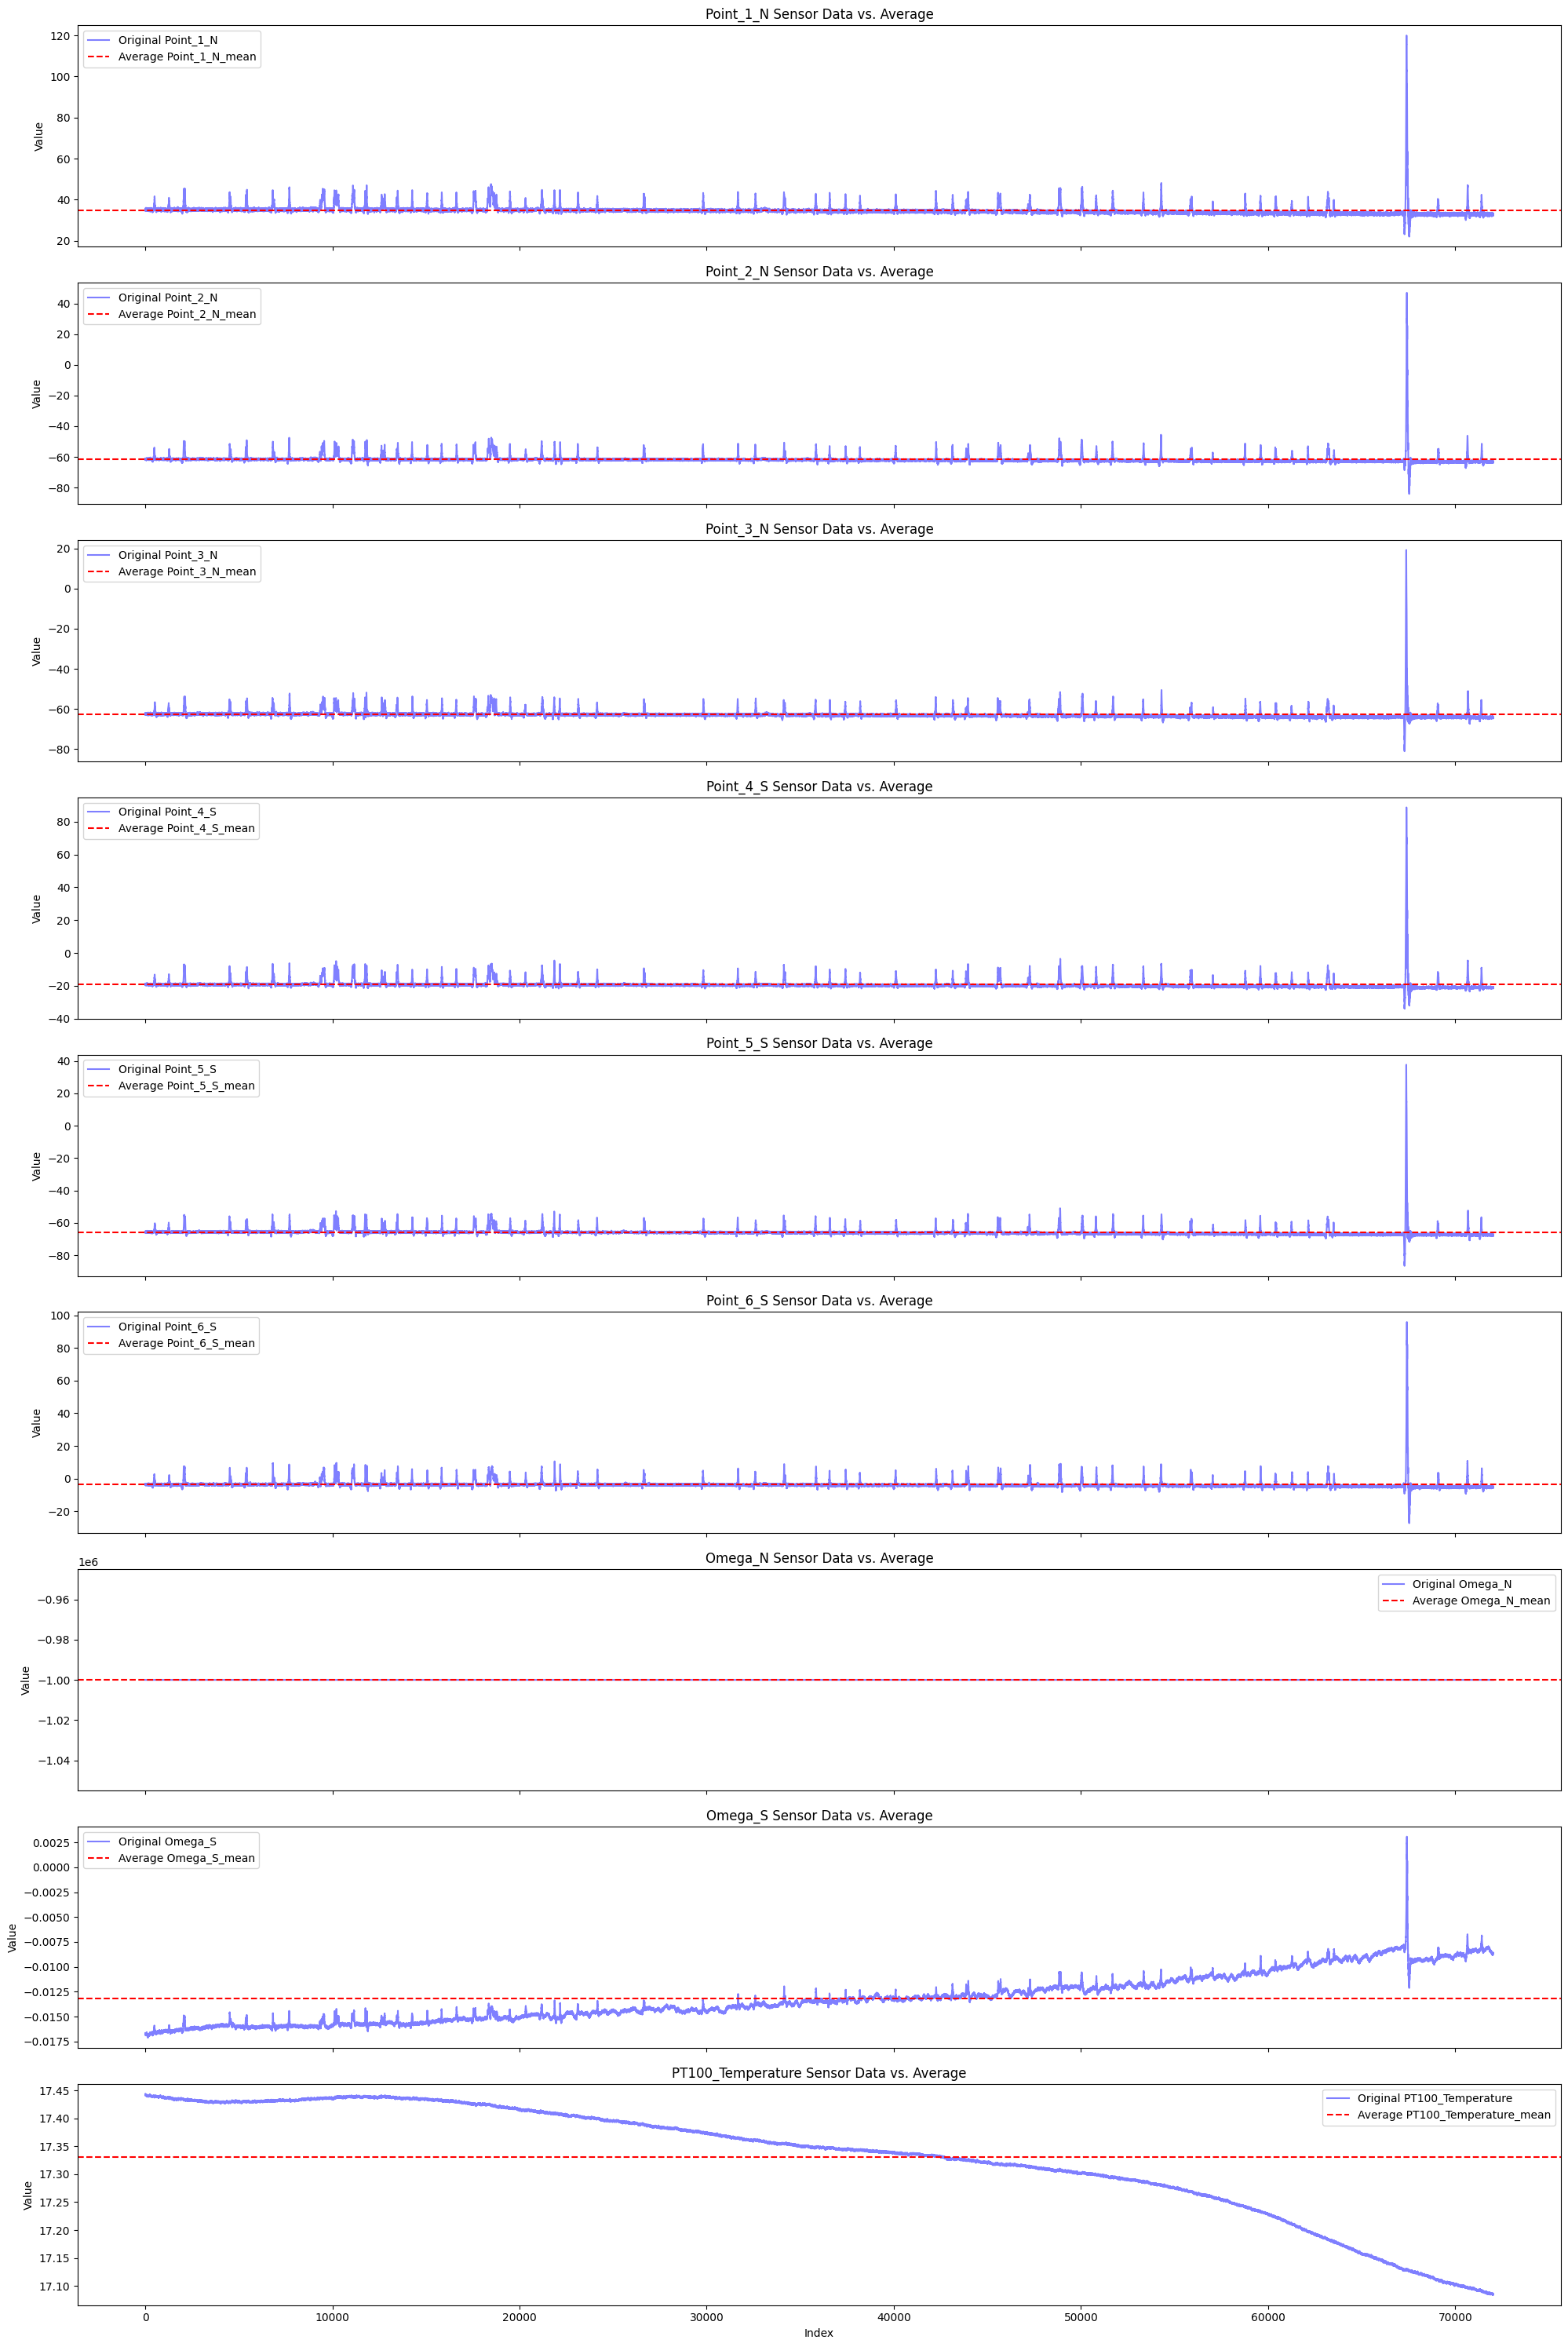

In [5]:
import matplotlib.pyplot as plt


# Prepare the plot
fig, axs = plt.subplots(len(aggregated_df.columns), 1, figsize=(20, 30), sharex=True)

for i, column in enumerate(aggregated_df.columns):
    # Extract the original column name without '_mean' to match with 'data' DataFrame
    original_column = column.replace('_mean', '')
    
    # Plot original data
    axs[i].plot(data.index, data[original_column], label=f'Original {original_column}', color='blue', alpha=0.5)
    
    # Plot average value as a horizontal line
    mean_value = aggregated_df[column].iloc[0]
    axs[i].axhline(y=mean_value, color='red', linestyle='--', label=f'Average {column}')
    
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].set_title(f'{original_column} Sensor Data vs. Average')

# Set common labels
plt.xlabel('Index')
plt.tight_layout()
plt.show()


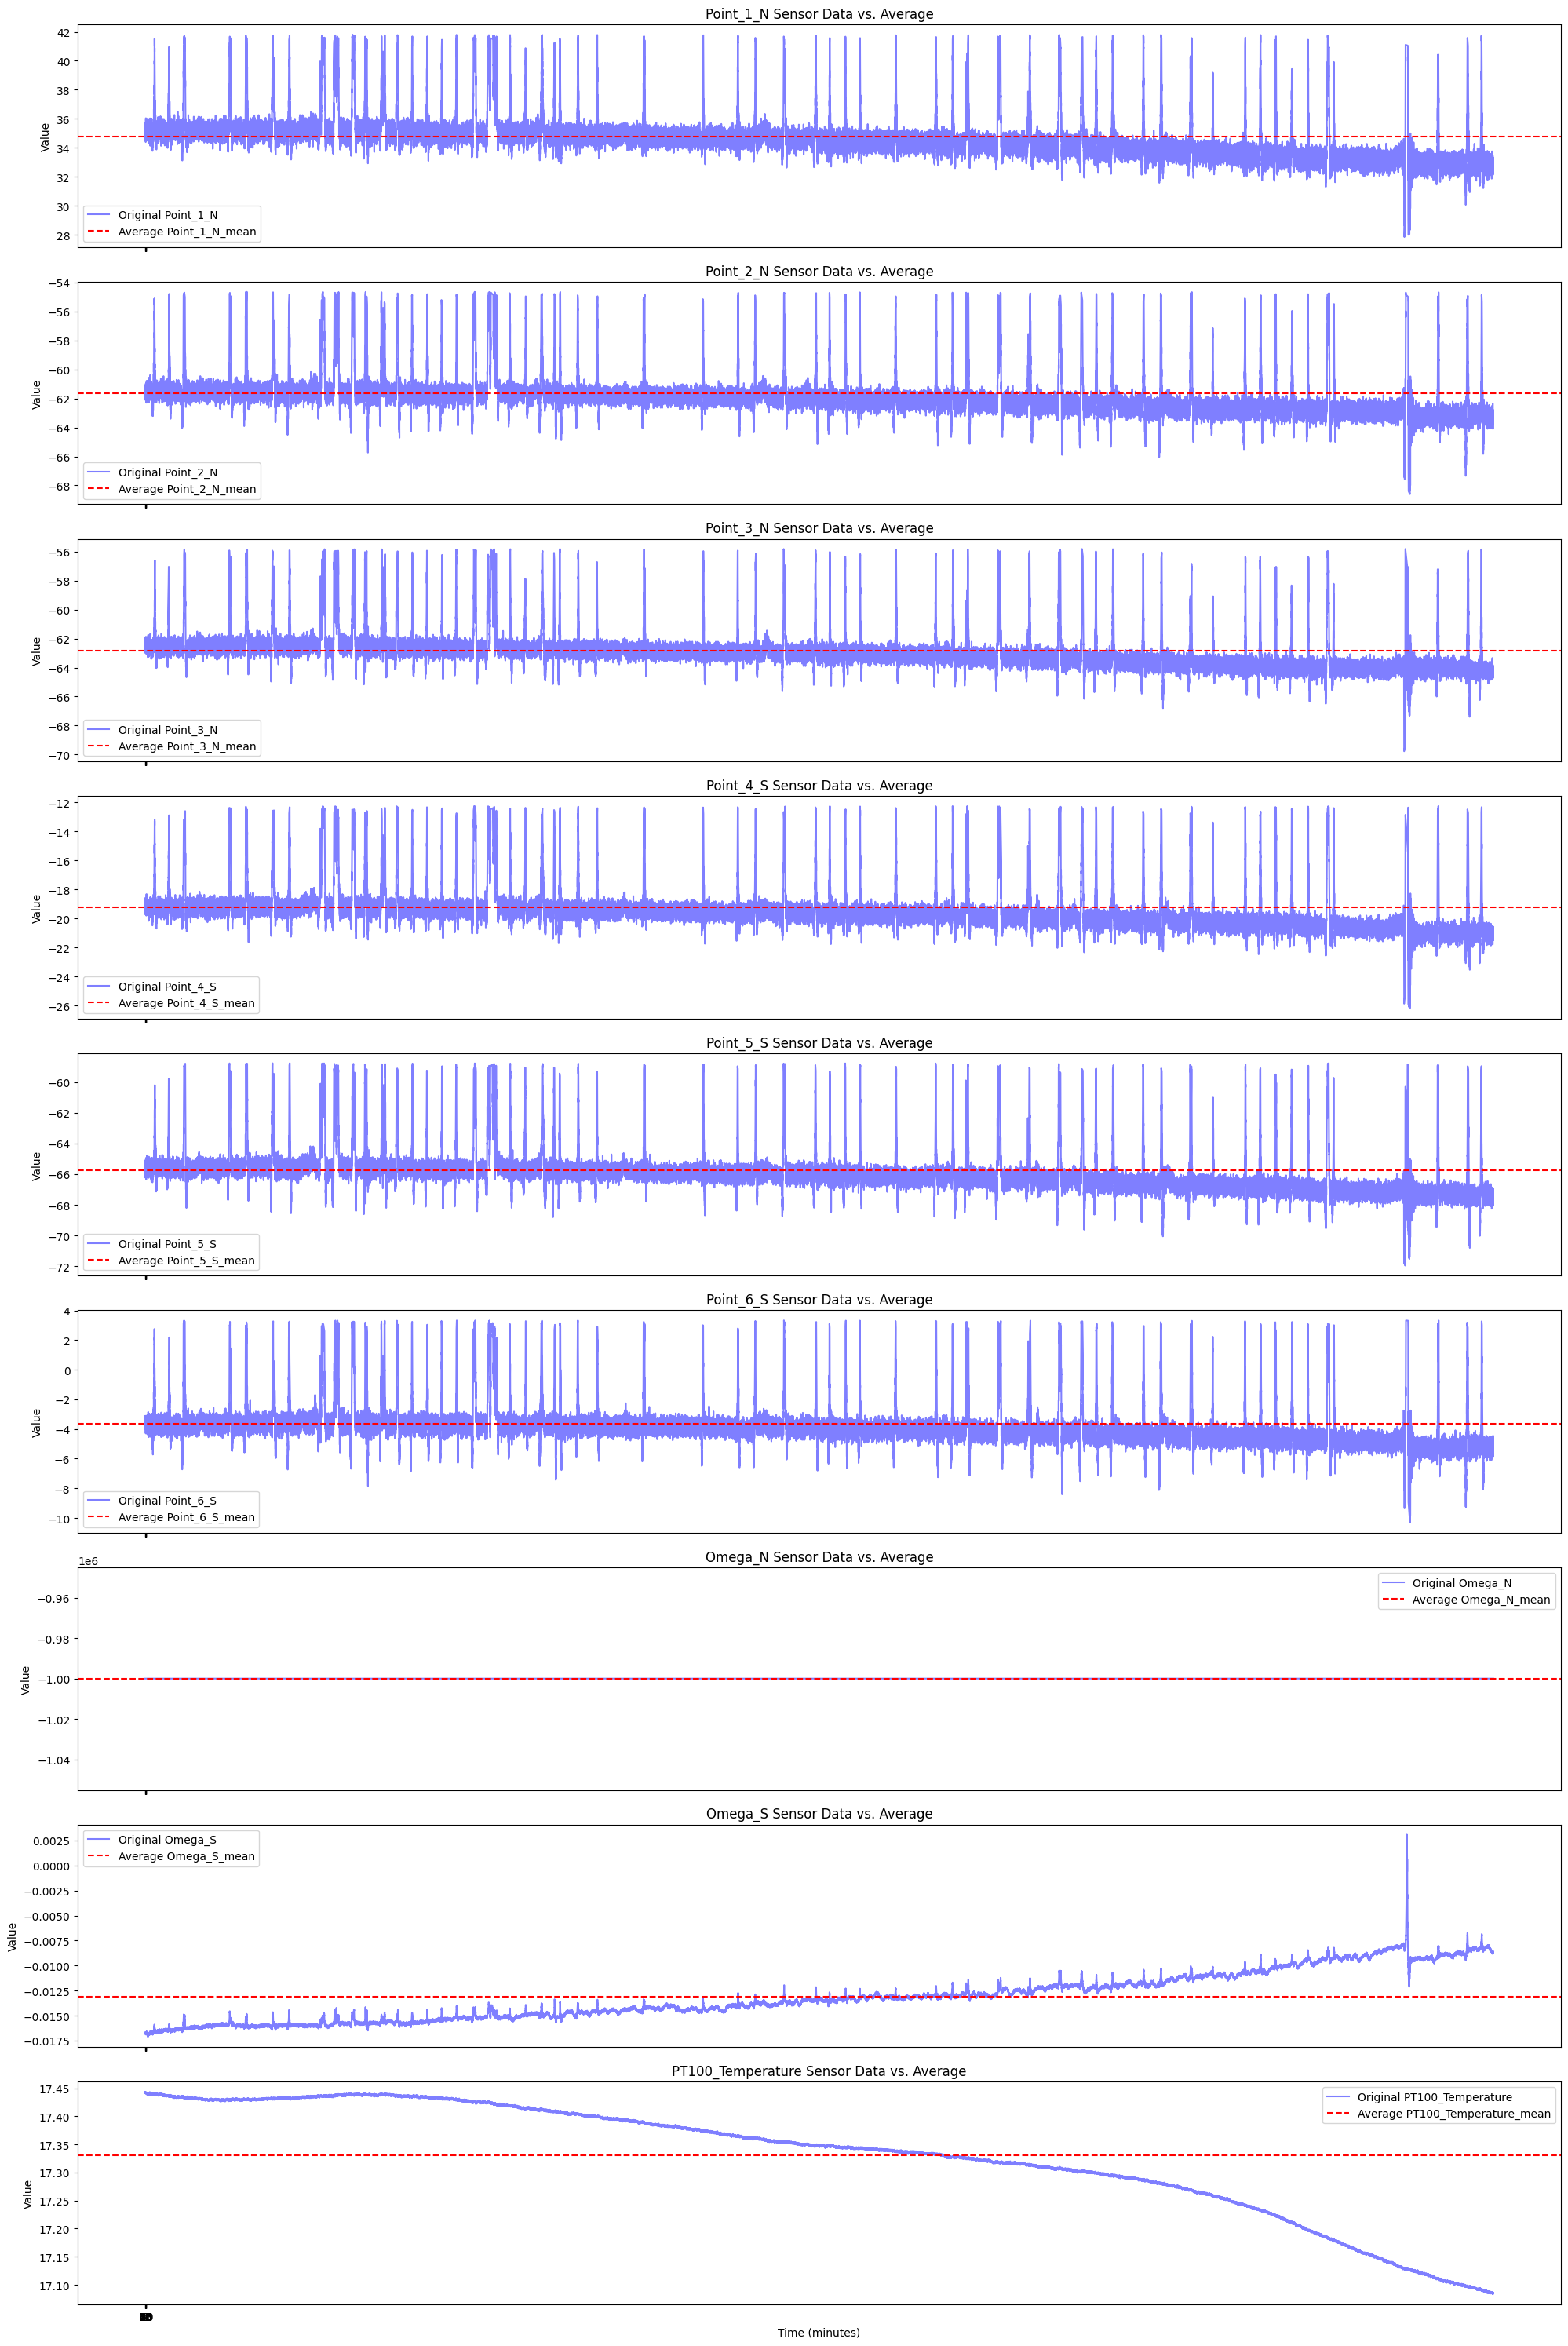

In [9]:
import matplotlib.pyplot as plt
import numpy as np



# Convert index to minutes if it's not already in that format
# Assuming 'data' has a datetime index or similar, you might need to convert it
# For demonstration, we'll simulate an index from 0 to 59 for one hour
data.index = np.arange(0, 72037)  # Assuming 60 data points, one for each minute

# Prepare the plot
fig, axs = plt.subplots(len(aggregated_df.columns), 1, figsize=(20, 30), sharex=True)

for i, column in enumerate(aggregated_df.columns):
    original_column = column.replace('_mean', '')
    mean_value = aggregated_df[column].iloc[0]

    # Filter values more than 10 units above the mean
    mask = (data[original_column] <= (mean_value + 7)) & (data[original_column] >= (mean_value - 7))
    filtered_data = data[original_column][mask]

    # Plot filtered data
    axs[i].plot(filtered_data.index, filtered_data, label=f'Original {original_column}', color='blue', alpha=0.5)
    
    # Plot average value as a horizontal line
    axs[i].axhline(y=mean_value, color='red', linestyle='--', label=f'Average {column}')
    
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].set_title(f'{original_column} Sensor Data vs. Average')

# Adjusting the x-axis to show minutes from 0 to 60
plt.xticks(np.arange(0, 61, 5))  # Set x-axis ticks to every 5 minutes for clarity
plt.xlabel('Time (minutes)')
plt.tight_layout()
plt.show()